<a href="https://colab.research.google.com/github/ev1025/CP1/blob/main/Code_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인스타카트 데이터 분석

참고자료 : 케글 인스타카트 장바구니 분석 데이터     
https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis

# 1. CRISP-DM 기반 분석

## 1) 비즈니스이해

## 2) 데이터 이해

## 3) 데이터 전처리

In [ ]:
import pandas as pd

df1 = pd.read_csv('/content/drive/MyDrive/인스타카트/aisles.csv')               # 소분류
df2 = pd.read_csv('/content/drive/MyDrive/인스타카트/departments.csv')          # 대분류
df3 = pd.read_csv('/content/drive/MyDrive/인스타카트/order_products__prior.csv')
df4 = pd.read_csv('/content/drive/MyDrive/인스타카트/order_products__train.csv')
df5 = pd.read_csv('/content/drive/MyDrive/인스타카트/orders.csv')
df6 = pd.read_csv('/content/drive/MyDrive/인스타카트/products.csv')

In [ ]:
# 데이터 합치는 함수
def df_merge(t1,t2,t3):
    data = pd.merge(t1,t2)
    data = pd.merge(data,t3)
    return data

In [ ]:
df_prior = df_merge(df3,df5,df6)
df_train = df_merge(df4,df5,df6)

In [ ]:
# 그래프분석에 사용할 데이터 만들기
prior_graph = df_prior.drop(['product_id','aisle_id','department_id','eval_set'],axis=1)
train_graph = df_train.drop(['product_id','aisle_id','department_id','eval_set'],axis=1)

In [ ]:
# 컬럼명 변경
def df_rename(data):
    data.columns = ['주문번호','선택순서','재주문','유저번호','누적주문','요일','주문시간','주문텀','제품']
    return data

In [ ]:
prior_graph = df_rename(prior_graph)
train_graph = df_rename(train_graph)

In [ ]:
train_graph.sort_values(by=['주문번호','선택순서'])

,주문번호,선택순서,재주문,유저번호,누적주문,요일,주문시간,주문텀,제품
0,1,1,1,112108,4,4,10,9.0,Bulgarian Yogurt
8,1,2,1,112108,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese
152,1,3,0,112108,4,4,10,9.0,Organic Celery Hearts
1214,1,4,0,112108,4,4,10,9.0,Cucumber Kirby
3627,1,5,1,112108,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil
...,...,...,...,...,...,...,...,...,...
690528,3421063,3,1,169679,30,0,10,4.0,Natural Artesian Water
1171703,3421063,4,1,169679,30,0,10,4.0,Twice Baked Potatoes
71873,3421070,1,1,139822,15,6,10,8.0,Organic Unsweetened Almond Milk
321777,3421070,2,1,139822,15,6,10,8.0,Creamy Peanut Butter


In [ ]:
train_graph.groupby('유저번호')['제품'].value_counts(ascending=False)

유저번호    제품                                  
1       0% Greek Strained Yogurt                1
        Aged White Cheddar Popcorn              1
        Cinnamon Toast Crunch                   1
        Milk Chocolate Almonds                  1
        Organic Half & Half                     1
                                               ..
206209  Diet Pepsi Pack                         1
        Fabric Softener Sheets                  1
        French Baguette Bread                   1
        Original Multigrain Spoonfuls Cereal    1
        Phish Food Frozen Yogurt                1
Name: 제품, Length: 1384617, dtype: int64

In [ ]:
train_graph.query('유저번호 == 47543')['제품'].value_counts()

Bag of Organic Bananas                                           1
Spring Water                                                     1
Medium Red Enchilada Sauce                                       1
Masa Harina Golden Corn Flour                                    1
Organic Diced Fire Roasted Tomatoes                              1
Bicolor Sweet Corn                                               1
Organic Diced Tomatoes Fire Roasted with Medium Green Chilies    1
Organic Stoneground Wheat Crackers                               1
Organic Chicken Broth                                            1
Organic Riced Cauliflower                                        1
Organic Tomato Paste                                             1
Yellow Onions                                                    1
Organic Jalapeno Pepper                                          1
Unsweetened Almondmilk                                           1
White Onion                                                   

In [ ]:
abc

Banana                                           18726
Bag of Organic Bananas                           15480
Organic Strawberries                             10894
Organic Baby Spinach                              9784
Large Lemon                                       8135
                                                 ...  
Red Raspberry Syrup                                  1
Organic Montebello Penne Rigate Italian Pasta        1
ULTRACLEAN™ Arctic Mint Mouth Wash                   1
Torrential Tropical Punch                            1
Plain Golden Toasted Bread Crumbs                    1
Name: 제품, Length: 39123, dtype: int64

In [ ]:
abc[:5].index.values

array(['Banana', 'Bag of Organic Bananas', 'Organic Strawberries',
       'Organic Baby Spinach', 'Large Lemon'], dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0, flags=flags)


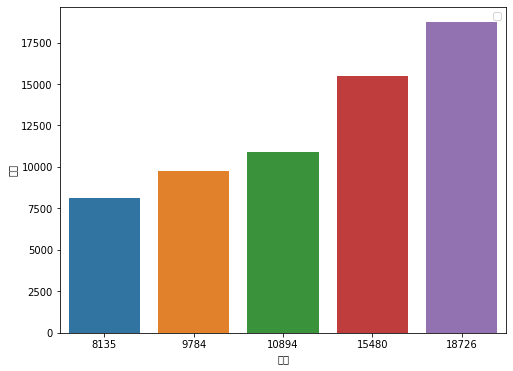

In [ ]:
abc = train_graph['제품'].value_counts()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(abc[:5], x= list(abc[:5].index),y=abc)
# plt.bar(abc.index[:5])
plt.legend()

In [ ]:
# df_prior.to_csv(index=False)
# df_train.to_csv('file.csv',index=False)

### 결측치확인

In [ ]:
df1.isnull().sum()

In [ ]:
df2.isnull().sum()

In [ ]:
df3.isnull().sum()

In [ ]:
df4.isnull().sum()

In [ ]:
df5.isnull().sum() # 현재 주문 이전 주문과의 텀(데이터 유지)

In [ ]:
df6.isnull().sum()

In [ ]:
df1

## 4) 모델링

## 5) 평가

## 6) 배포